In [18]:
import math
import numpy as np
import random
import matplotlib.pyplot as plt

In [81]:
# Open input file
infile = open('berlin52.tsp', 'r')

# Read instance header
Name = infile.readline().strip().split()[1] # NAME
FileType = infile.readline().strip().split()[1] # TYPE
Comment = infile.readline().strip().split()[1] # COMMENT
Dimension = infile.readline().strip().split()[1] # DIMENSION
EdgeWeightType = infile.readline().strip().split()[1] # EDGE_WEIGHT_TYPE
infile.readline()

# Read node list
N = int(Dimension)
nodelist = []
distances = np.zeros((N, N))

for i in range(0, N):
    x,y = infile.readline().strip().split()[1:]
    nodelist.append([float(x), float(y)])

for i in range(0,N):
    for j in range(0, N):
        # xd = nodelist[i][i]
        distances[i][j] = int(math.sqrt((nodelist[i][0] - nodelist[j][0])**2 + (nodelist[i][1] - nodelist[j][1])**2))
        distances[j][i] = distances[i][j]

# print(nodelist)
# Close input file
infile.close()

In [83]:
def set_Matrix():
    # Open input file
    infile = open('berlin52.tsp', 'r')

    # Read instance header
    Name = infile.readline().strip().split()[1] # NAME
    FileType = infile.readline().strip().split()[1] # TYPE
    Comment = infile.readline().strip().split()[1] # COMMENT
    Dimension = infile.readline().strip().split()[1] # DIMENSION
    EdgeWeightType = infile.readline().strip().split()[1] # EDGE_WEIGHT_TYPE
    infile.readline()

    # Read node list
    N = int(Dimension)
    nodelist = []
    distances = np.zeros((N, N))
    for i in range(0, N):
        x,y = infile.readline().strip().split()[1:]
        nodelist.append([float(x), float(y)])

    for i in range(0,N):
        for j in range(0, N):
            # xd = nodelist[i][i]
            distances[i][j] = int(math.sqrt((nodelist[i][0] - nodelist[j][0])**2 + (nodelist[i][1] - nodelist[j][1])**2))
            distances[j][i] = distances[i][j]

    # print(nodelist)
    # Close input file
    infile.close()
    return distances

In [21]:
def print_matrix(Distance_Matrix):
    print(Distance_Matrix)

In [22]:
def symetric_random_instance(number_of_cities, min_distance, max_distance):
    rand_matrix =np.random.randint(min_distance, max_distance + 1, size=(number_of_cities,number_of_cities))
    # np.random.random_integers(min_distance, max_distance, size=(number_of_cities,number_of_cities))
    for i in range(number_of_cities):
        rand_matrix[i][i] = 0
    return rand_matrix

distances = symetric_random_instance(10,1,10)
N = np.shape(distances)[0]

In [23]:
def print_solution(solution):
    print(solution)
    '''
    iterate = len(solution) - 1
    for i in range(iterate):
        print(solution[i], ' -> ', solution[i+1], '\n')
    '''

In [24]:
def get_weight(cities_list, Distance_Matrix):
    sum = 0
    n = np.shape(Distance_Matrix)[0]
    for i in range(n-2):
        sum = sum + Distance_Matrix[cities_list[i]][cities_list[i+1]]
    # back to the start city
    sum = sum + Distance_Matrix[n-1][0]
    return sum


In [25]:
def nearest_neighbour(city_index, Distance_Matrix):
    n = np.shape(Distance_Matrix)[0]
    if(city_index != 0):
        min = Distance_Matrix[city_index][0]
        min_ind = 0
    else:
        min = Distance_Matrix[city_index][1]
        min_ind = 1
    for i in range(n):
        if(city_index != i):
            if(Distance_Matrix[city_index][i] < min):
                min = Distance_Matrix[city_index][i]
                min_ind = i
    return min_ind


In [26]:
def swapPositions(list, pos1, pos2):
    list[pos1], list[pos2] = list[pos2], list[pos1]
    return list

In [27]:
def nearest_swap_neighbour(city_list, Distance_Matrix):
    leng = len(city_list)
    min_weight = get_weight(city_list, Distance_Matrix)
    best_trace = city_list.copy()
    current_trace = city_list.copy()
    for i in range(int(leng/2 +1 )):
        for j in range(leng):
            current_trace = city_list.copy()
            current_trace = swapPositions(current_trace, i, j)
            current_weight = get_weight(current_trace, Distance_Matrix)
            if(current_weight < min_weight):
                best_trace = current_trace
                min_weight = current_weight
    return best_trace

In [37]:
def invertttt(city_list, Distance_Matrix):
    leng = len(city_list)
    min_weight = get_weight(city_list, Distance_Matrix)
    best_trace = city_list.copy()
    current_trace = city_list.copy()
    for i in range(int(leng/2 + 1)):
        current_trace_copy = city_list.copy()
        current_trace_copy = swapPositions(current_trace_copy, i, leng - i - 1)
        current_weight = get_weight(current_trace_copy, Distance_Matrix)
        if(current_weight < min_weight):
            best_trace = current_trace
            min_weight = current_weight
    return best_trace

30766.0
23450.0
12


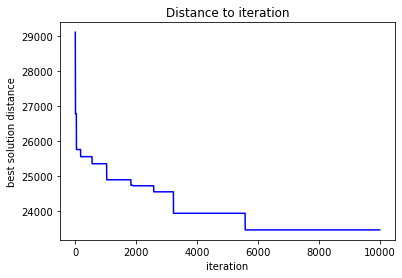

In [84]:
N = 100 # number of cities
k = 10000 # number of samples
X = [None]*k
number_of_better_solution = 0

#Matrixx = symetric_random_instance(N, 1, 100)
Matrixx = set_Matrix()
N = np.shape(Matrixx)[0]
#initial step
trace = random.sample(range(N),N)
min_weight  = get_weight(trace, Matrixx)# = funkcja liczaca wage
print(min_weight)
# min_permutation = trace
# Wielka pentla powtarzajaca sie k-razy
for i in range(k):
    new_trace = random.sample(range(N),N)
    new_weight = get_weight(new_trace, Matrixx)# = funkcja liczaca wage
    if (new_weight < min_weight):
        min_weight = new_weight
        trace = new_trace
        number_of_better_solution += 1
    X[i] = min_weight
    '''if(i % 1000 == 0):
        X
        print(i, ' ', min_weight)'''

print(min_weight)
print(number_of_better_solution)

plt.plot(X, '-b')
plt.xlabel('iteration')
plt.ylabel('best solution distance')
# giving a title to my graph
plt.title('Distance to iteration')
plt.show()
#print_solution(trace)


1. Chose start city
2. Find nearest neighbour for that city ang go there
    - min_distance = distance(current_city, 0_city)
    - min_city = 0_city
    - for i in (N): 
    -   new_distance = distance(current_city, i_city)
    -   if (new_distance < min_distance>) -> min_distance = new_distance, min_city = i_city
    - current_city = min_city
    - add current_city to the way (permutation)
3. Repeat 2nd step for N-times where N is the number of cities

In [134]:
N = 100 # number of cities
Matrixx = symetric_random_instance(N, 1, 100)
Matrixx = set_Matrix()
N = np.shape(Matrixx)[0]
solution = [None]*N

for i in range(N):
    go_to = nearest_neighbour(i, Matrixx)
    solution[i] = go_to

distance = get_weight(solution, Matrixx)
print(distance)

18811.0


In [86]:
N = 100 # number of cities
Matrixx = symetric_random_instance(N, 1, 100)
Matrixx = set_Matrix()
N = np.shape(Matrixx)[0]
best_solution = [None]*N
current_solution = [None]*N

for i in range(N):
    go_to = nearest_neighbour(i, Matrixx)
    best_solution[i] = go_to
best_distance = get_weight(best_solution, Matrixx)

print(best_distance)

for i in range(1, N):
    for j in range(N):
        go_to = nearest_neighbour(i, Matrixx)
        current_solution[j] = go_to
    current_distance = get_weight(current_solution, Matrixx)
    if(current_distance < best_distance):
        best_solution = current_solution

print(best_distance)

18811.0
18811.0


In [88]:
N = 10 # number of cities
k = 100
Matrixx = symetric_random_instance(N, 1, 100)
Matrixx = set_Matrix()
N = np.shape(Matrixx)[0]
best_solution = [None]*N
current_solution = [None]*N

trace = random.sample(range(N),N)
min_weight  = get_weight(trace, Matrixx)# = funkcja liczaca wage
print(min_weight)

for i in range(k):
    trace = nearest_swap_neighbour(trace, Matrixx)

print(get_weight(trace, Matrixx))
print(trace)



28193.0
10690.0
[10, 51, 13, 12, 25, 46, 28, 49, 44, 9, 8, 7, 40, 18, 39, 5, 3, 42, 50, 11, 26, 27, 24, 45, 22, 41, 6, 1, 29, 19, 47, 23, 4, 14, 37, 33, 0, 21, 30, 20, 16, 2, 17, 31, 48, 35, 36, 38, 34, 43, 15, 32]


In [38]:
N = 50 # number of cities
k = 10000
Matrixx = symetric_random_instance(N, 1, 100)
best_solution = [None]*N
current_solution = [None]*N

trace = random.sample(range(N),N)
min_weight  = get_weight(trace, Matrixx)# = funkcja liczaca wage
print(min_weight)

for i in range(k):
    trace = invertttt(trace, Matrixx)

print(get_weight(trace, Matrixx))
print(trace)

2252
2252
[24, 10, 22, 2, 18, 33, 30, 17, 8, 26, 47, 11, 21, 49, 25, 5, 44, 35, 13, 1, 9, 16, 37, 40, 41, 3, 31, 27, 43, 29, 19, 12, 15, 23, 28, 0, 34, 4, 7, 39, 48, 38, 14, 45, 42, 46, 32, 6, 36, 20]
